In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Full alg

In [51]:
def get_score(data, spilt):
    x1 = data[spilt==1].sum(axis=0)/data[spilt==1].sum()
    x2 = data[spilt==0].sum(axis=0)/data[spilt==0].sum()
    return np.linalg.norm(x1-x2)
    
def show_class_disb(data, split):
    train = (data[split==1].sum(axis=0)/data[split==1].sum())
    test = (data[split==0].sum(axis=0)/data[split==0].sum())
    return train-test

def train_test_split(data, split, num_iter=10):
    scores = list()
    scores.append(get_score(data, split))
    print("Initial class distribution diff initial: ",show_class_disb(data, split))
    
    for i in range(num_iter):
        diff = data[split==0][:,:,None] - np.transpose(data[split==1], (1, 0))[None,:,:]
        d1, d2 = data[split==1].sum(axis=0), data[split==0].sum(axis=0)
        ch_matr1 = (d1[None,:,None]+diff)
        ch_matr2 = (d2[None,:,None]-diff)
        ch_matr1 = ch_matr1/ch_matr1.sum(axis=1, keepdims=True)
        ch_matr2 = ch_matr2/ch_matr2.sum(axis=1, keepdims=True)
        potential_scores = ((ch_matr1 - ch_matr2)**2).sum(axis=1)
        r_ind, l_ind = np.where(potential_scores==np.min(potential_scores))
        r_ind, l_ind = np.where(split==0)[0][r_ind], np.where(split==1)[0][l_ind]
        split[r_ind] = 1
        split[l_ind] = 0
        scores.append(get_score(data, split))
        
        if (i>5):
            change_metric = (np.diff(scores[-5:])/np.array(scores[-5:-1])).mean()
            if change_metric > -0.01:
                break
        
    plt.plot(scores)
    print("Final class distribution diff: ",show_class_disb(data, split))
    return split

In [52]:
data = np.random.randint(0,5, size=(100,10))
train_ind = np.concatenate([np.ones(70), np.zeros(30)])

Initial class distribution diff initial:  [ 0.02376294 -0.00255686 -0.00847978  0.00323925  0.00146986 -0.0107371
 -0.00885056 -0.01337488 -0.0033407   0.01886783]
Final class distribution diff:  [ 0.00051448  0.00094678 -0.00019174 -0.00078243 -0.00023461 -0.00195072
  0.00176851 -0.00274269  0.00231634  0.00035608]


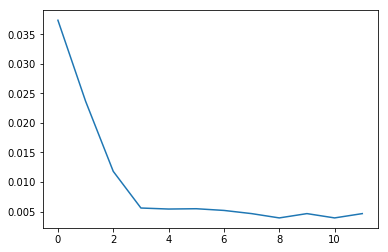

In [53]:
train_test_split(data, train_ind, num_iter=100)